## Regression
     Predict continuous valued output.
<hr />

## Linear Regression Implementation
## Steps
#### `1. Load Data`
#### `2. Splitting the dataset into training set and test set`

#### `3. Define a Hypothesis Function:` \( h(x) = mx + b \)

#### `4. Define a Cost Function` \(MSE\)  

#### `5. Compute Gradient Descent`
- Define a function to compute gradient
- Define a function to use batch gradient descent

#### `6. Initialize Parameters and call gradient descent function:`
   - Initialize the slope \( m \) and intercept \( b \) parameters with arbitrary values (usually 0 or small random numbers).

#### `7. Model Training:`
   - Use the training dataset to train the linear regression model by minimizing the cost function through gradient descent.

#### `7. Model Evaluation`
   - Evaluate the trained model using, Mean Squared Error (MSE),Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

#### `8. Make Predictions on Test set`

#### `9. Visualization `
   - Visualize the training data, the regression line, and the predictions to understand the relationship between the independent and dependent variables.

#### `10. Optimization and Tuning`
   - Experiment with different learning rates, regularization techniques, and feature engineering to improve model performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

### Load the datasets

In [2]:
# Dataset for values of x
dataset1 = pd.read_csv('./ex2Data/ex2x.dat', header=None)
X = dataset1.iloc[:, 0].values  # slicing operation to select all rows and column 0

In [3]:
# Dataset for values of y
dataset2 = pd.read_csv('./ex2Data/ex2y.dat', header=None)
y = dataset2.iloc[:, 0].values

array([0.77918926, 0.91596757, 0.90538354, 0.90566138, 0.9389889 ,
       0.9668474 , 0.96436824, 0.91445939, 0.93933944, 0.96074971,
       0.89837094, 0.91209739, 0.94238499, 0.96624578, 1.05265   ,
       1.0143791 , 0.95969426, 0.96853716, 1.0766065 , 1.1454978 ,
       1.0340625 , 1.0070009 , 0.96683648, 1.0895919 , 1.0634462 ,
       1.1237239 , 1.0323374 , 1.0874452 , 1.0702988 , 1.1606493 ,
       1.0778037 , 1.1069758 , 1.0971875 , 1.1648603 , 1.1411796 ,
       1.0844156 , 1.1252493 , 1.1168341 , 1.1970789 , 1.2069462 ,
       1.1251046 , 1.1235672 , 1.2132829 , 1.2522652 , 1.2497065 ,
       1.1799706 , 1.1897299 , 1.3029934 , 1.2601134 , 1.2562267 ])

### Splitting the dataset into training set and test set

In [5]:
test_size = 0.2
np.random.seed(42) # set random seed for reproducibility (it ensures that the randomization process is the same every time you run the code)
# shuffle indices
num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Calculate number of samples in the test set
num_test_samples = int(num_samples * test_size)

# Split indices into training and test sets
test_indices = indices[:num_test_samples]
train_indices = indices[num_test_samples:]

# Split the data based on indices
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

`X_train` variable contain the features (input variables) of the training set\
`X_test`  variable contains the features (input variables) of the test set\
`y_train` variable contains the corresponding labels or target values for the training set\
`y_test` variable contains the corresponding labels or target values for the test set

### Plotting the data

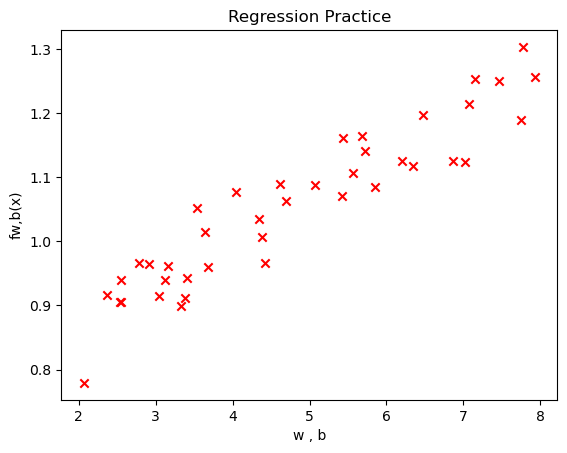

In [29]:
# Plot the training data points
plt.scatter(X_train, y_train, marker='x', c='r')
plt.title("Regression Practice")
plt.ylabel('fw,b(x)')
plt.xlabel('w , b')
plt.show()

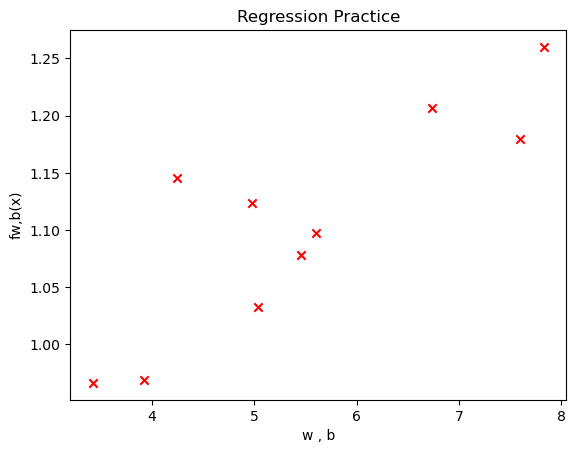

In [30]:
# Plot the test data points
plt.scatter(X_test, y_test, marker='x', c='r')
plt.title("Regression Practice")
plt.ylabel('fw,b(x)')
plt.xlabel('w , b')
plt.show()

### Simple Linear Regression

- The model function for linear regression, is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, we want to find the best \(w,b\) parameters that fit our dataset.  

    - To compare how one choice of \(w,b\) is better or worse than another choice, we can evaluate it with a cost function J(w,b\)
      - \(J\) is a function of \(w,b\) . That is, the value of the cost J(w,b\) depends on the value of \(w,b\).
  
    - The choice of \((w,b)\) that fits the data the best is the one that has the smallest cost \(J(w,b)\).


- To find the values \((w,b)\) that gets the smallest possible cost \(J(w,b)\), we can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters \((w,b)\) come closer to the optimal values that will achieve the lowest cost \(J(w,b)\).
  

- The trained linear regression model can then take the input feature \(x\) and output a prediction \(f_{w,b}(x)\) (predicted).

- For Linear Regression we have to draw a straight line which best fit the data.
- To draw a line we have a line equation which is called Slope intercept form `y = mx + b`. It will be used to draw a straight line to fit data.

### Hypothesis Function

In [31]:
# Hypothesis Function
def hypothesis(w, x, i, b):
    f_wb = w * x[i] + b
    return f_wb

## Cost Function for Linear Regression
$$ J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

In [32]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
#         f_wb = w * x[i] + b
        f_wb = hypothesis(w, x, i, b)
        total_cost = total_cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * total_cost
    
    return total_cost

## Compute Gradient Descent
$$
\begin{align*}
& \text{repeat until convergence:} \; \lbrace \\
& \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \\
& \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \\
& \rbrace
\end{align*}
$$
where
$$
\frac{\partial J(w,b)}{\partial b}^{(i)} = (f_{w,b}(x^{(i)}) - y^{(i)}) 
$$
$$
\frac{\partial J(w,b)}{\partial w}^{(i)} = (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} 
$$


In [33]:
# Compute gradient
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    
    dj_dw = 0 # The gradient of the cost w.r.t. the parameters w
    dj_db = 0 # The gradient of the cost w.r.t. the parameters b
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_temp = (f_wb - y[i]) * x[i]
        dj_db_temp = f_wb - y[i]
        dj_db += dj_db_temp
        dj_dw += dj_dw_temp
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    
    return dj_dw, dj_db

####  Using batch gradient descent 
- Now finding the optimal parameters of a linear regression model by using batch gradient descent. Batch refers to running all the examples in one iteration.

In [34]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after running gradient descent
      b : (scalar) Updated value of parameter of the model after running gradient descent
      J_history : (list) History of costs at each iteration
      w_history : (list) History of w values at each iteration
    """
    
    m = len(x)
    
    # Lists to store cost J and w's at each iteration -- primarily for graphing later
    J_history = []
    w_history = []
    
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i % 100 == 0:  # Save cost every 100 iterations
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
            w_history.append(w)

            # Print cost every 10% of the iterations
            print(f"Iteration {i:4}: Cost {float(cost):8.2f}")

    return w, b, J_history, w_history

### Initailize the parameters and do some gradient descent setting

In [35]:
# initialize parameters.
initial_w =0 
initial_b =0 

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.32
Iteration  100: Cost     0.02
Iteration  200: Cost     0.02
Iteration  300: Cost     0.02
Iteration  400: Cost     0.01
Iteration  500: Cost     0.01
Iteration  600: Cost     0.01
Iteration  700: Cost     0.01
Iteration  800: Cost     0.01
Iteration  900: Cost     0.00
Iteration 1000: Cost     0.00
Iteration 1100: Cost     0.00
Iteration 1200: Cost     0.00
Iteration 1300: Cost     0.00
Iteration 1400: Cost     0.00
w,b found by gradient descent: 0.08870388299816517 0.6154754459948741


- We will now use the final parameters from gradient descent to plot the linear fit.

- Note! that we get the prediction for a single example  𝑓(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏

- To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example, as in below block of code.

In [36]:
# Make predictions on the training set
m_train = X_train.shape[0]
predicted_train = np.zeros(m_train)
for i in range(m_train):
    predicted_train[i] = w * X_train[i] + b
#     print(f'For {X_train[i]}, we predict {predicted_train[i]}')

### Model Evaluation

In [37]:
# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [38]:
# Evaluate the model using evaluation metrics on the training set
mse_train = mean_squared_error(y_train, predicted_train)
rmse_train = root_mean_squared_error(y_train, predicted_train)
mae_train = mean_absolute_error(y_train, predicted_train)

# Print training set metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)

# In the context of regression evaluation metrics such as (MSE), (RMSE) and (MAE), lower values indicate better performance.

Training Set Metrics:
Mean Squared Error (MSE): 0.0037587389074473605
Root Mean Squared Error (RMSE): 0.061308554928715786
Mean Absolute Error (MAE): 0.049885999836130956


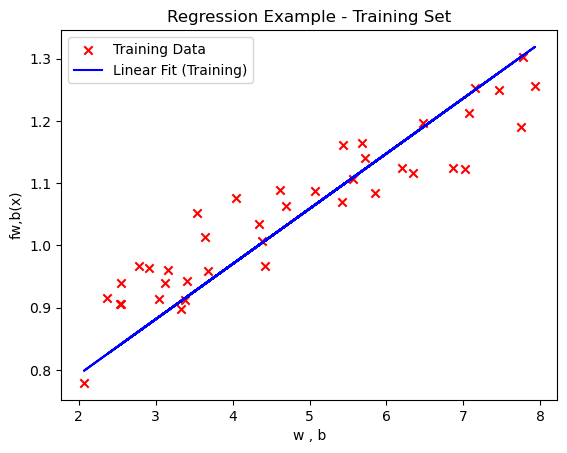

In [39]:
# Plotting for training set
plt.scatter(X_train, y_train, marker='x', c='r', label='Training Data')
plt.plot(X_train, predicted_train, c='b', label='Linear Fit (Training)')
plt.title("Regression Example - Training Set")
plt.ylabel('fw,b(x)')
plt.xlabel('w , b')
plt.legend()
plt.show()

### Make Predictions on Test set

In [40]:
m_test = X_test.shape[0]
predicted_test = np.zeros(m_test)
for i in range(m_test):
    predicted_test[i] = w * X_test[i] + b
    print(f'For {X_test[i]}, we predict {predicted_test[i]}')

For 3.4215823, we predict 0.918983082002667
For 6.7383791, we predict 1.2131958372785556
For 5.4563207, we predict 1.0994722789681408
For 7.5973874, we predict 1.2893932090162084
For 3.9256462, we predict 0.9636955072118658
For 7.8264514, we predict 1.3097120752713
For 5.0359967, we predict 1.06218790805082
For 4.9777333, we predict 1.0570197182341448
For 5.6015729, we predict 1.1123567131221668
For 4.2483348, we predict 0.9923192390311075


In [16]:
# Evaluate the model using evaluation metrics on the test set
mse_test = mean_squared_error(y_test, predicted_test)
rmse_test = root_mean_squared_error(y_test, predicted_test)
mae_test = mean_absolute_error(y_test, predicted_test)

print("Test Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)

Training Set Metrics:
Mean Squared Error (MSE): 0.0037587389074473605
Root Mean Squared Error (RMSE): 0.061308554928715786
Mean Absolute Error (MAE): 0.049885999836130956

Test Set Metrics:
Mean Squared Error (MSE): 0.004623340272009264
Root Mean Squared Error (RMSE): 0.06799514888585262
Mean Absolute Error (MAE): 0.050394631522740665


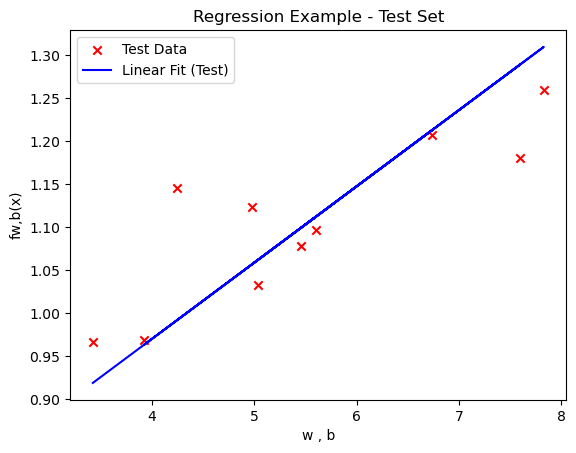

In [41]:
# Plotting for test set
plt.scatter(X_test, y_test, marker='x', c='r', label='Test Data')
plt.plot(X_test, predicted_test, c='b', label='Linear Fit (Test)')
plt.title("Regression Example - Test Set")
plt.ylabel('fw,b(x)')
plt.xlabel('w , b')
plt.legend()
plt.show()